# Foundations of AI & ML
## Session 09
### Experiment 1 

# Pytorch
It’s a Python based scientific computing package targeted at two sets of audiences:

1. A replacement for NumPy to use the power of GPUs

2. a deep learning research platform that provides maximum flexibility and speed

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

In this experiment we will use MNIST dataset and will be implementing MLP using Pytorch. We are going to do this step-by-step

1. Loading MNIST dataset and Visualize
2. Defining Loss functions
3. Doing forward pass
4. Run the classifier the complete test set and compute accuracy.

To install the pytorch run the following command.

In [4]:
# !pip3 install --upgrade pip

    100% |████████████████████████████████| 1.4MB 577kB/s ta 0:00:011
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


In [5]:
# !pip3 install http://download.pytorch.org/whl/cpu/torch-0.3.1-cp35-cp35m-linux_x86_64.whl

torch-0.3.1-cp35-cp35m-linux_x86_64.whl is not a supported wheel on this platform.


In [1]:
### Importing required pytorch packages
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# Hyper Parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 10
learning_rate = 0.001

Now, we'll load the MNIST data. First time we may have to download the data, which can take a while.

In [3]:
#Loading the train set file
train_dataset = dsets.MNIST(root='../data', 
                            train=True, 
                            transform=transforms.ToTensor(),  
                            download=True)
#Loading the test set file
test_dataset = dsets.MNIST(root='../data', 
                           train=False, 
                           transform=transforms.ToTensor())

Processing...
Done!


In [5]:
# dsets.MNIST?

Loading the dataset

In [4]:
#loading the train dataset
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

# loading the test dataset

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

The train and test data are provided via data loaders that provide iterators over the datasets. Loading X and Y train values from the loader.

In [5]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([10, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([10]) type: torch.LongTensor


In [6]:
X_train.shape

torch.Size([10, 1, 28, 28])

#### Plotting first 10 training digits

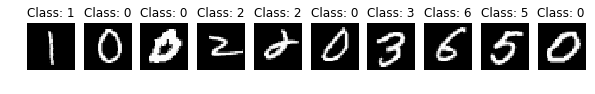

In [7]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28), cmap="gray")
    plt.title('Class: '+str(y_train[i]))

Let's define the network as a Python class. We have to write the __init__() and forward() methods, and PyTorch will automatically generate a backward() method for computing the gradients for the backward pass.

In [15]:
nn.Linear?

In [8]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

#### Creating a neural network object

In [9]:
net = Net(input_size, hidden_size, num_classes)

#### Loss and Optimizer

The CrossEntropyLoss function uses inputs, labels  to calculate the loss

In [10]:
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)  

In [20]:
# nn.CrossEntropyLoss?
nn.Module?

### Training the Model

In [11]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        # Forward + Backward + Optimize
        optimizer.zero_grad()  ### zero the gradient buffer ------- Clears the gradients of all optimized
        inputs = net(images) ### IAS: This will call forward() from __call__
        loss = criterion(inputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))


Epoch [1/5], Step [100/6000], Loss: 0.2056
Epoch [1/5], Step [200/6000], Loss: 0.0601
Epoch [1/5], Step [300/6000], Loss: 0.5993
Epoch [1/5], Step [400/6000], Loss: 0.3932
Epoch [1/5], Step [500/6000], Loss: 0.1116
Epoch [1/5], Step [600/6000], Loss: 0.1122
Epoch [1/5], Step [700/6000], Loss: 0.3272
Epoch [1/5], Step [800/6000], Loss: 0.0616
Epoch [1/5], Step [900/6000], Loss: 0.2600
Epoch [1/5], Step [1000/6000], Loss: 0.1075
Epoch [1/5], Step [1100/6000], Loss: 0.0186
Epoch [1/5], Step [1200/6000], Loss: 0.7629
Epoch [1/5], Step [1300/6000], Loss: 0.0373
Epoch [1/5], Step [1400/6000], Loss: 0.0388
Epoch [1/5], Step [1500/6000], Loss: 0.1475
Epoch [1/5], Step [1600/6000], Loss: 0.8414
Epoch [1/5], Step [1700/6000], Loss: 0.0806
Epoch [1/5], Step [1800/6000], Loss: 0.1269
Epoch [1/5], Step [1900/6000], Loss: 0.2006
Epoch [1/5], Step [2000/6000], Loss: 0.7020
Epoch [1/5], Step [2100/6000], Loss: 0.1661
Epoch [1/5], Step [2200/6000], Loss: 0.2803
Epoch [1/5], Step [2300/6000], Loss: 0.07

Epoch [4/5], Step [800/6000], Loss: 0.0314
Epoch [4/5], Step [900/6000], Loss: 0.0003
Epoch [4/5], Step [1000/6000], Loss: 0.0000
Epoch [4/5], Step [1100/6000], Loss: 0.0586
Epoch [4/5], Step [1200/6000], Loss: 0.2106
Epoch [4/5], Step [1300/6000], Loss: 0.1109
Epoch [4/5], Step [1400/6000], Loss: 0.0210
Epoch [4/5], Step [1500/6000], Loss: 0.0009
Epoch [4/5], Step [1600/6000], Loss: 0.1050
Epoch [4/5], Step [1700/6000], Loss: 0.0180
Epoch [4/5], Step [1800/6000], Loss: 0.0030
Epoch [4/5], Step [1900/6000], Loss: 0.0065
Epoch [4/5], Step [2000/6000], Loss: 0.0009
Epoch [4/5], Step [2100/6000], Loss: 0.0001
Epoch [4/5], Step [2200/6000], Loss: 0.2135
Epoch [4/5], Step [2300/6000], Loss: 0.0017
Epoch [4/5], Step [2400/6000], Loss: 0.0115
Epoch [4/5], Step [2500/6000], Loss: 0.0000
Epoch [4/5], Step [2600/6000], Loss: 0.0036
Epoch [4/5], Step [2700/6000], Loss: 0.0003
Epoch [4/5], Step [2800/6000], Loss: 0.0001
Epoch [4/5], Step [2900/6000], Loss: 0.0094
Epoch [4/5], Step [3000/6000], Los

In [29]:
# optimizer.zero_grad?
# loss.backward?
# optimizer.step?

### Test the Model

In [12]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))


Accuracy of the network on the 10000 test images: 97 %


In [31]:
torch.max?

# Exercise 1:

Change the number of epochs to 10 and batch size to 50. Check the output for the same.

In [13]:
num_epochs = 10
batch_size = 50
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Convert torch tensor to Variable
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        # Forward + Backward + Optimize
        optimizer.zero_grad()  ### zero the gradient buffer ------- Clears the gradients of all optimized
        inputs = net(images) ### IAS: This will call forward() from __call__
        loss = criterion(inputs, labels)
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
            
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))            

Epoch [1/10], Step [100/1200], Loss: 0.0007
Epoch [1/10], Step [200/1200], Loss: 0.0002
Epoch [1/10], Step [300/1200], Loss: 0.0001
Epoch [1/10], Step [400/1200], Loss: 0.0000
Epoch [1/10], Step [500/1200], Loss: 0.0013
Epoch [1/10], Step [600/1200], Loss: 0.0000
Epoch [1/10], Step [700/1200], Loss: 0.0011
Epoch [1/10], Step [800/1200], Loss: 0.0000
Epoch [1/10], Step [900/1200], Loss: 0.2621
Epoch [1/10], Step [1000/1200], Loss: 0.0027
Epoch [1/10], Step [1100/1200], Loss: 0.0003
Epoch [1/10], Step [1200/1200], Loss: 0.0003
Epoch [1/10], Step [1300/1200], Loss: 0.0031
Epoch [1/10], Step [1400/1200], Loss: 0.0364
Epoch [1/10], Step [1500/1200], Loss: 0.0000
Epoch [1/10], Step [1600/1200], Loss: 0.0004
Epoch [1/10], Step [1700/1200], Loss: 0.0020
Epoch [1/10], Step [1800/1200], Loss: 0.0002
Epoch [1/10], Step [1900/1200], Loss: 0.0000
Epoch [1/10], Step [2000/1200], Loss: 0.0159
Epoch [1/10], Step [2100/1200], Loss: 0.0055
Epoch [1/10], Step [2200/1200], Loss: 0.0758
Epoch [1/10], Step 

Epoch [4/10], Step [400/1200], Loss: 0.4152
Epoch [4/10], Step [500/1200], Loss: 0.0004
Epoch [4/10], Step [600/1200], Loss: 0.0000
Epoch [4/10], Step [700/1200], Loss: 0.0022
Epoch [4/10], Step [800/1200], Loss: 0.0319
Epoch [4/10], Step [900/1200], Loss: 0.0000
Epoch [4/10], Step [1000/1200], Loss: 0.0000
Epoch [4/10], Step [1100/1200], Loss: 0.0037
Epoch [4/10], Step [1200/1200], Loss: 0.0000
Epoch [4/10], Step [1300/1200], Loss: 0.0001
Epoch [4/10], Step [1400/1200], Loss: 0.2406
Epoch [4/10], Step [1500/1200], Loss: 0.0000
Epoch [4/10], Step [1600/1200], Loss: 0.0001
Epoch [4/10], Step [1700/1200], Loss: 0.0000
Epoch [4/10], Step [1800/1200], Loss: 0.0001
Epoch [4/10], Step [1900/1200], Loss: 0.0000
Epoch [4/10], Step [2000/1200], Loss: 0.0000
Epoch [4/10], Step [2100/1200], Loss: 0.0000
Epoch [4/10], Step [2200/1200], Loss: 0.0000
Epoch [4/10], Step [2300/1200], Loss: 0.0000
Epoch [4/10], Step [2400/1200], Loss: 0.0000
Epoch [4/10], Step [2500/1200], Loss: 0.0000
Epoch [4/10], St

Epoch [7/10], Step [700/1200], Loss: 0.0005
Epoch [7/10], Step [800/1200], Loss: 0.0024
Epoch [7/10], Step [900/1200], Loss: 0.0011
Epoch [7/10], Step [1000/1200], Loss: 0.0000
Epoch [7/10], Step [1100/1200], Loss: 0.0000
Epoch [7/10], Step [1200/1200], Loss: 0.0000
Epoch [7/10], Step [1300/1200], Loss: 0.0000
Epoch [7/10], Step [1400/1200], Loss: 0.0109
Epoch [7/10], Step [1500/1200], Loss: 0.0000
Epoch [7/10], Step [1600/1200], Loss: 0.0000
Epoch [7/10], Step [1700/1200], Loss: 0.0037
Epoch [7/10], Step [1800/1200], Loss: 0.0000
Epoch [7/10], Step [1900/1200], Loss: 0.0000
Epoch [7/10], Step [2000/1200], Loss: 0.0000
Epoch [7/10], Step [2100/1200], Loss: 0.0000
Epoch [7/10], Step [2200/1200], Loss: 0.0001
Epoch [7/10], Step [2300/1200], Loss: 0.0469
Epoch [7/10], Step [2400/1200], Loss: 0.0000
Epoch [7/10], Step [2500/1200], Loss: 0.0004
Epoch [7/10], Step [2600/1200], Loss: 0.0000
Epoch [7/10], Step [2700/1200], Loss: 0.0000
Epoch [7/10], Step [2800/1200], Loss: 0.0051
Epoch [7/10],

Epoch [10/10], Step [1000/1200], Loss: 0.0652
Epoch [10/10], Step [1100/1200], Loss: 0.0000
Epoch [10/10], Step [1200/1200], Loss: 0.0000
Epoch [10/10], Step [1300/1200], Loss: 0.0000
Epoch [10/10], Step [1400/1200], Loss: 0.0000
Epoch [10/10], Step [1500/1200], Loss: 0.0000
Epoch [10/10], Step [1600/1200], Loss: 0.0000
Epoch [10/10], Step [1700/1200], Loss: 0.0000
Epoch [10/10], Step [1800/1200], Loss: 0.0000
Epoch [10/10], Step [1900/1200], Loss: 0.0000
Epoch [10/10], Step [2000/1200], Loss: 0.0009
Epoch [10/10], Step [2100/1200], Loss: 0.0000
Epoch [10/10], Step [2200/1200], Loss: 0.0000
Epoch [10/10], Step [2300/1200], Loss: 0.0001
Epoch [10/10], Step [2400/1200], Loss: 0.0000
Epoch [10/10], Step [2500/1200], Loss: 0.0003
Epoch [10/10], Step [2600/1200], Loss: 0.0000
Epoch [10/10], Step [2700/1200], Loss: 0.0000
Epoch [10/10], Step [2800/1200], Loss: 0.0000
Epoch [10/10], Step [2900/1200], Loss: 0.0000
Epoch [10/10], Step [3000/1200], Loss: 1.4339
Epoch [10/10], Step [3100/1200], L

In [ ]:
We see that the accuracy increased by 1% :-) !